In [1]:
#Primero, se importan las librerías que vamos a usar
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# Regresion lineal
from sklearn.linear_model import LinearRegression
# Importar/ Exportar modelos
from joblib import dump, load
import joblib
# Metricas
from sklearn.metrics import mean_squared_error as mse
# q-q plots
import scipy.stats as stats

df_original = pd.read_csv('estudiantes_train.csv', on_bad_lines = 'skip')
df_estudiantes = df_original.copy()
print(df_estudiantes.shape)
df_estudiantes.head(5)

(1569, 10)


,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,4,432,320,94,2,1.38,3.50,8.78,1,73.00


In [2]:
df_estudiantes=df_estudiantes.dropna()
indexes = df_estudiantes[ (df_estudiantes['GRE Score'] > 340) | ((df_estudiantes['TOEFL Score'] > 120)&(df_estudiantes['TOEFL Score'] < 0))  | (df_estudiantes['University Rating'] > 5)  | (df_estudiantes['SOP'] > 5) | (df_estudiantes['LOR '] > 5)  | ((df_estudiantes['CGPA'] > 10) & (df_estudiantes['CGPA'] < 0)) | ((df_estudiantes['Admission Points'] > 150)&(df_estudiantes['Admission Points'] <0))  ].index
df_estudiantes=df_estudiantes.drop(indexes)
df_estudiantes = df_estudiantes[df_estudiantes['Admission Points'] <= df_estudiantes['Admission Points'].median() + 3*df_estudiantes['Admission Points'].std()]
df_estudiantes=df_estudiantes.drop(df_estudiantes['Admission Points'].idxmax())
print(df_estudiantes.shape)
df_estudiantes.head(15)

(1492, 10)


,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,4,432,320,94,2,1.38,3.50,8.78,1,73.00
5,5,112,321,84,4,4.13,4.00,8.68,1,69.00
6,6,55,306,110,3,3.00,3.50,8.00,0,70.00
7,7,59,299,112,1,0.97,2.00,6.82,1,40.03
8,8,123,311,74,4,1.50,0.53,8.36,0,57.00
9,9,477,298,98,2,2.23,3.73,7.43,0,49.08


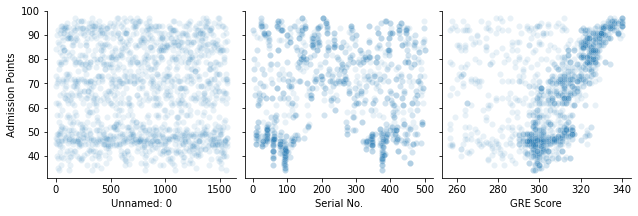

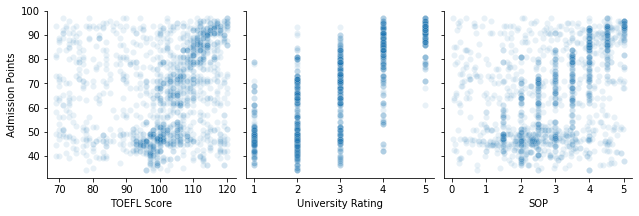

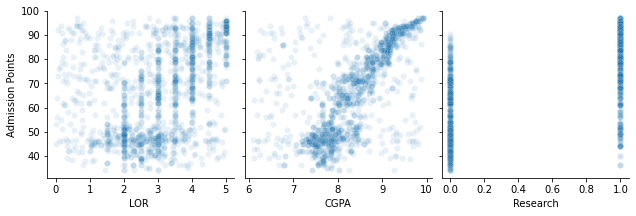

In [3]:
sns.pairplot(df_estudiantes, height=3, y_vars = 'Admission Points', x_vars = df_estudiantes.columns[0:3], kind='scatter', plot_kws = {'alpha':0.1})
sns.pairplot(df_estudiantes, height=3, y_vars = 'Admission Points', x_vars = df_estudiantes.columns[3:6], kind='scatter', plot_kws = {'alpha':0.1})
sns.pairplot(df_estudiantes, height=3, y_vars = 'Admission Points', x_vars = df_estudiantes.columns[6:9], kind='scatter', plot_kws = {'alpha':0.1})

In [4]:
estudiantes_normalizado=(df_estudiantes-df_estudiantes.min())/(df_estudiantes.max()-df_estudiantes.min())

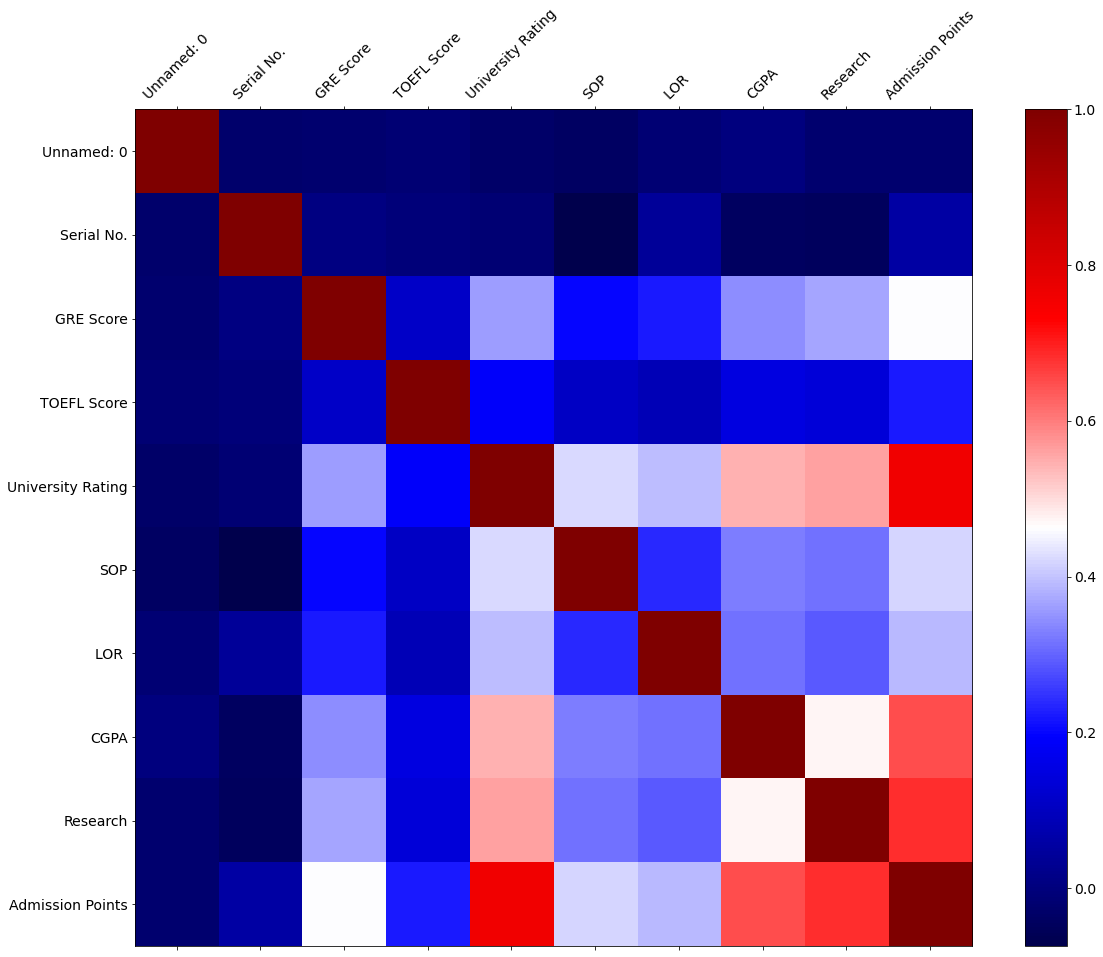

In [5]:
f = plt.figure(figsize=(19, 15))
plt.matshow(estudiantes_normalizado.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(estudiantes_normalizado.shape[1]), estudiantes_normalizado.columns, fontsize=14, rotation=45)
plt.yticks(range(estudiantes_normalizado.shape[1]), estudiantes_normalizado.columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [6]:
cols = ['CGPA','SOP','LOR ']

X = estudiantes_normalizado.drop('Admission Points', axis = 1)
y = estudiantes_normalizado['Admission Points']
    
pipeline = Pipeline([('initial',ColumnTransformer([("selector", 'passthrough',cols)])), # Selecciona
               ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), # Reemplaza valores nulos
               ('polinomial_fearure',PolynomialFeatures(2)), # Crea interaccion y cuadrados
               ('model', LinearRegression())]) # Modelo

pipeline = pipeline.fit(X,y)

#Se guarda el pipeline para ser utilizado después
# Usamos la lbreria joblib
filename = r'C:\Users\marti\OneDrive\Documentos\Sexto semestre\BI\Lab4\modelo.joblib'
# Se guarda
dump(pipeline, filename) 

['C:\\Users\\marti\\OneDrive\\Documentos\\Sexto semestre\\BI\\Lab4\\modelo.joblib']